## Projet IA Pour L'image
### Réseau neuronal convolutif sur la base "MNIST"

##### Installations nécessaires
pip install keras

pip install tensorflow

pip install numpy

pip install matplotlib

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

import keras 
from keras.datasets import mnist 
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('Training data shape : ', X_train.shape, Y_train.shape)
print('Testing data shape : ', X_test.shape, Y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


Text(0.5, 1.0, 'Ground Truth : 7')

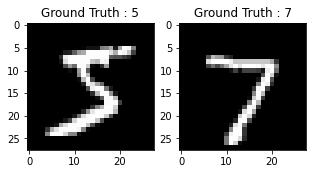

In [3]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))

In [4]:
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

train_Y_one_hot = to_categorical(Y_train)
test_Y_one_hot = to_categorical(Y_test)

# Display the change for category label using one-hot encoding
print('Original label:', Y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

X_train,valid_X,train_label,valid_label = train_test_split(X_train, train_Y_one_hot, test_size=0.2, random_state=13)

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Dans notre séquence de convolution, nous faisons appel à un MaxPooling2D : le MaxPooling2D est aussi connu sous le nom de sous-echantillonnage. Nous allons passer nos matrices pixels avec une matrice d'une taille que nous définissons. Dans notre cas la "pool_size" indique que l'on va sous-echantillonner nos matrice avec une matrice de taille 2x2. Grâce à ce sous-echantillonnage, nous allons détecter si nous repérons des "sous-motifs" connu dans la matrice qui parcourt notre image.

In [5]:
batch_size = 64
epochs = 20
num_classes = 10

# Initialising the CNN
classifier = Sequential()
classifier.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D((2, 2),padding='same'))
classifier.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
classifier.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
classifier.add(LeakyReLU(alpha=0.1))                  
classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
classifier.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
classifier.add(LeakyReLU(alpha=0.1))                  
classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
classifier.add(Flatten())
classifier.add(Dense(256, activation='linear'))
classifier.add(LeakyReLU(alpha=0.1))                  
classifier.add(Dense(num_classes, activation='softmax'))

classifier.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])
history_classifier = classifier.fit(X_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label)) 

Epoch 1/20
750/750 [==============================] - 32s 42ms/step - loss: 0.1619 - accuracy: 0.9477 - val_loss: 0.0579 - val_accuracy: 0.9821
Epoch 2/20
750/750 [==============================] - 33s 44ms/step - loss: 0.0430 - accuracy: 0.9864 - val_loss: 0.0583 - val_accuracy: 0.9811
Epoch 3/20
750/750 [==============================] - 32s 43ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 4/20
750/750 [==============================] - 34s 45ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.0433 - val_accuracy: 0.9878
Epoch 5/20
750/750 [==============================] - 33s 44ms/step - loss: 0.0177 - accuracy: 0.9948 - val_loss: 0.0347 - val_accuracy: 0.9908
Epoch 6/20
750/750 [==============================] - 33s 44ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0347 - val_accuracy: 0.9906
Epoch 7/20
750/750 [==============================] - 30s 40ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0397 - val_accuracy:

In [6]:
Eval_test = classifier.evaluate(X_test, test_Y_one_hot, verbose=0)
print('Test loss:', Eval_test [0])
print('Test accuracy:', Eval_test [1])

Test loss: 0.04821343347430229
Test accuracy: 0.991599977016449


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


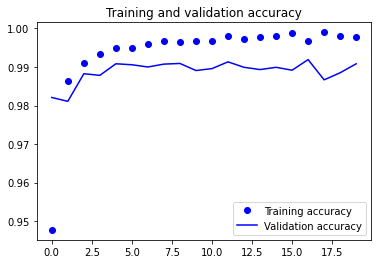

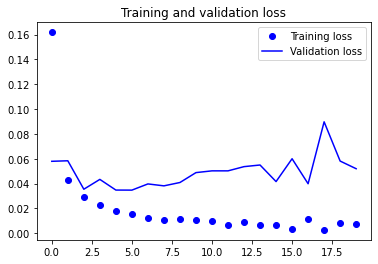

In [7]:
print(history_classifier.history.keys())
accuracy = history_classifier.history['accuracy']
val_accuracy = history_classifier.history['val_accuracy']
loss = history_classifier.history['loss']
val_loss = history_classifier.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()